## Prompt Chaining Workflow

- topic -> llm -> generate blog

- topic -> llm -> detailed outline -> llm -> generate a blog

#### START -> generate_outline -> generate_blog -> END

In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

import os
key = os.getenv("GROQ_API_KEY")

In [4]:
model = ChatGroq(model="llama-3.3-70b-versatile", api_key=key)
model.invoke("hello how are you").content

"Hello! I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or topics you'd like to discuss. How about you? How's your day going so far?"

In [21]:
# making state
class promptstate(TypedDict):
    topic : str
    outline : str
    content : str
    score : str

In [22]:
# node functions
def gen_outline(state: promptstate) -> promptstate:
    topic = state["topic"]

    prompt = f"generate a blog outline for the topic {topic}"

    outline = model.invoke(prompt)

    state["outline"] = outline.content

    return state



def gen_blog(state: promptstate) -> promptstate:
    outline = state["outline"]
    topic = state["topic"]

    prompt = f"generate a blog with the topic {topic} and outline {outline}"

    blog = model.invoke(prompt)

    state["content"] = blog.content

    return state


def evaluate(state: promptstate) -> promptstate:
    outline = state["outline"]
    blog = state["content"]

    prompt = f"based on the blog outline - {outline} and blog - {blog}. act as blog expert and give a score to the blog out of 10"

    score = model.invoke(prompt)

    state["score"] = score.content

    return state


In [23]:
#create graph
graph = StateGraph(promptstate)

#make nodes
graph.add_node("gen_outline", gen_outline)
graph.add_node("gen_blog", gen_blog)
graph.add_node("evaluate", evaluate)

#add edges
graph.add_edge(START, "gen_outline")
graph.add_edge("gen_outline", "gen_blog")
graph.add_edge( "gen_blog", "evaluate")
graph.add_edge("evaluate", END)

#compile node and edge
workflow = graph.compile()

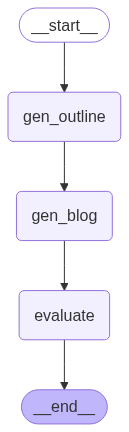

In [24]:
graph.compile()

In [25]:
initial_state = {"topic": "artificial intelligence future as agentic ai"}


final_state = workflow.invoke(initial_state)

In [26]:
print(final_state["content"])

**The Future of Artificial Intelligence: Embracing Agentic AI**

Artificial Intelligence (AI) has undergone significant transformations since its inception, evolving from simple rule-based systems to complex machine learning algorithms. As AI continues to advance, a new paradigm is emerging: Agentic AI. This revolutionary approach enables machines to make decisions, take actions, and interact with humans in more sophisticated ways, poised to play a significant role in shaping the future of AI. In this blog, we will explore the concept of Agentic AI, its benefits, challenges, and future applications, as well as the ethical considerations and implications of this emerging technology.

**What is Agentic AI?**

Agentic AI refers to a type of AI that possesses autonomy, agency, and decision-making capabilities, allowing it to interact with its environment and make decisions based on its own goals and objectives. Unlike traditional AI approaches, such as rule-based systems and machine learni

In [27]:
print(final_state["score"])

I'd be happy to provide a score for the blog post on "The Future of Artificial Intelligence: Embracing Agentic AI" based on the provided outline and content.

**Score: 8.5/10**

Here's a breakdown of the strengths and weaknesses of the blog post:

**Strengths:**

1. **Clear structure**: The blog post follows a logical and easy-to-follow structure, starting with an introduction to Agentic AI, its benefits, challenges, and future applications, and concluding with ethical considerations and implications.
2. **Well-defined concepts**: The author provides a clear definition of Agentic AI and its key characteristics, making it easy for readers to understand the concept.
3. **Examples and illustrations**: The blog post includes relevant examples and illustrations to help readers understand the benefits and applications of Agentic AI.
4. **Comprehensive coverage**: The author covers a wide range of topics related to Agentic AI, including its benefits, challenges, future applications, and ethic